In [7]:
#includes
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

In [8]:
#downloading
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [9]:
#normalised
x_train = x_train / 255
x_test = x_test / 255



In [ ]:
#converting outputs to vectors by cattegories
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

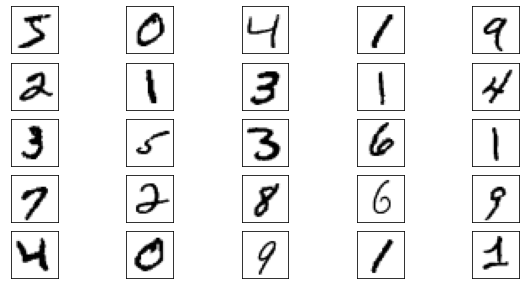

In [10]:
#example of images from the dataset
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [14]:
#creating network model

model = keras.Sequential([
  Flatten(input_shape=(28,28,1)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
#network compiling
model.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [17]:
#learning
model.fit(x_train, y_train_cat,batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2915 - accuracy: 0.9171 - val_loss: 0.1569 - val_accuracy: 0.9572
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1277 - accuracy: 0.9633 - val_loss: 0.1215 - val_accuracy: 0.9634
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0890 - accuracy: 0.9742 - val_loss: 0.1081 - val_accuracy: 0.9684
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0658 - accuracy: 0.9802 - val_loss: 0.0915 - val_accuracy: 0.9726
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0856 - val_accuracy: 0.9735


In [18]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9756


[0.08018549531698227, 0.975600004196167]

[[4.9715834e-07 1.1893390e-07 1.3830919e-05 3.2322080e-04 3.5507758e-10
  7.5934725e-09 3.0017872e-12 9.9956459e-01 5.8572977e-07 9.7153781e-05]]
Распознанная цифра: 7


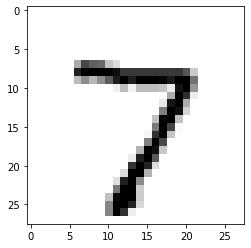

[[1.4275614e-07 5.5667419e-06 9.9997604e-01 1.8050319e-05 4.2490831e-16
  2.4396845e-09 8.9494728e-10 2.6756603e-12 2.7933427e-07 2.0559028e-12]]
Распознанная цифра: 2


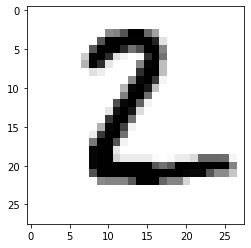

[[2.0203230e-05 9.9853194e-01 2.0407343e-04 2.7410517e-05 5.0022791e-05
  1.0257919e-05 2.5706271e-05 7.3044363e-04 3.9393976e-04 5.9719605e-06]]
Распознанная цифра: 1


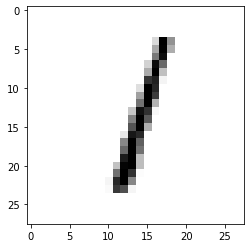

[[9.9971014e-01 9.7717772e-09 2.7977143e-04 5.5366268e-08 2.0818504e-08
  1.3885060e-07 4.1568447e-07 2.5930478e-06 1.2377128e-06 5.6155582e-06]]
Распознанная цифра: 0


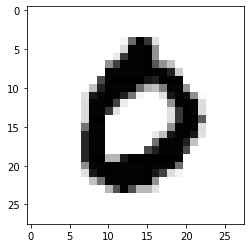

[[5.2900523e-06 1.2000278e-08 1.1201498e-05 1.2672071e-07 9.9939227e-01
  3.1884207e-07 2.0949026e-06 3.5439520e-05 1.7027361e-06 5.5160606e-04]]
Распознанная цифра: 4


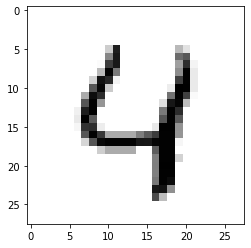

In [20]:
#tesing of network
for n in range(5):
  x = np.expand_dims(x_test[n], axis=0)
  res = model.predict(x)
  print(res)
  print(f"Распознанная цифра: {np.argmax(res)}")

  plt.imshow(x_test[n], cmap=plt.cm.binary)
  plt.show()

In [21]:
#all seq recognition
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [30]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = y_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(244, 28, 28)


Значение сети:  2  а предполагалось что это  8


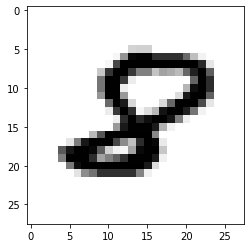

Значение сети:  2  а предполагалось что это  4


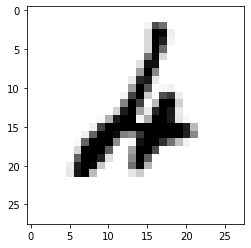

Значение сети:  0  а предполагалось что это  6


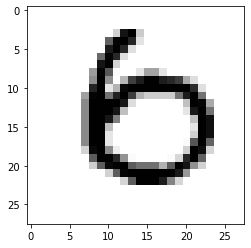

Значение сети:  7  а предполагалось что это  2


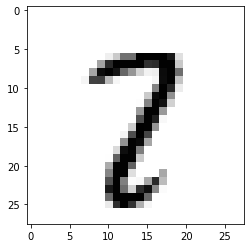

Значение сети:  3  а предполагалось что это  5


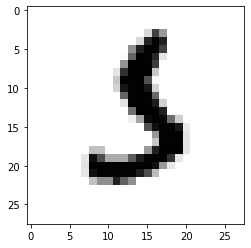

In [37]:
for i in range(5):
  print("Значение сети: ",str(p_false[i])," а предполагалось что это ", y_false[i])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()